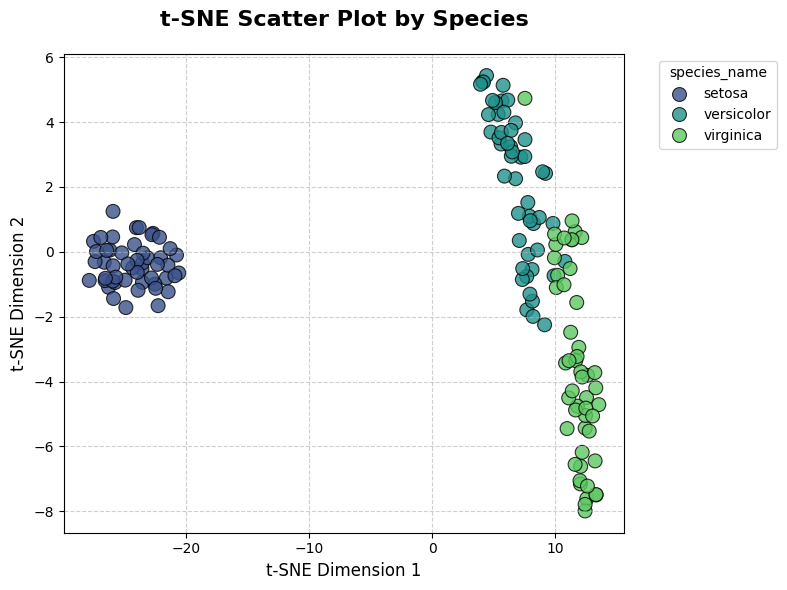

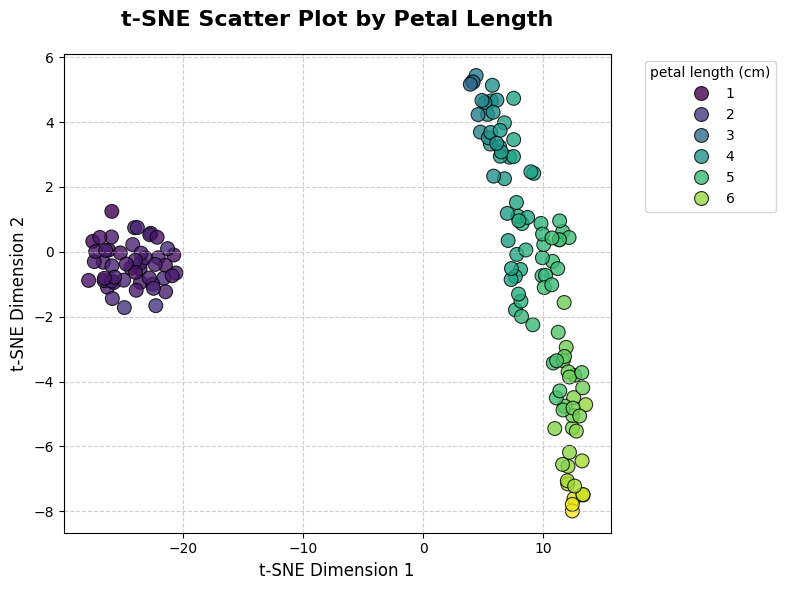

In [1]:
# ================ Visualizing the Iris Dataset with t-SNE ================
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# Load the Iris dataset
iris = load_iris()
iris_data = iris.data  # Feature data (numerical)
iris_target = iris.target  # Target labels
iris_target_names = iris.target_names  # Target names (species)

# Create a DataFrame for better handling of data
df = pd.DataFrame(iris_data, columns=iris.feature_names)
df['species'] = iris_target
df['species_name'] = df['species'].apply(lambda x: iris_target_names[x])

# Initialize the t-SNE model with a specified learning rate
tsne_model = TSNE(learning_rate=50, random_state=42)

# Perform dimensionality reduction with t-SNE
tsne_features = tsne_model.fit_transform(iris_data)

# Add t-SNE features to the DataFrame
df['x'] = tsne_features[:, 0]  # First t-SNE dimension
df['y'] = tsne_features[:, 1]  # Second t-SNE dimension

# Define a function to create visually appealing scatter plots
def plot_tsne(df, hue, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='x', y='y', hue=hue, data=df, palette='viridis', s=100, edgecolor='k', alpha=0.8
    )
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('t-SNE Dimension 1', fontsize=12)
    plt.ylabel('t-SNE Dimension 2', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title=hue, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot t-SNE scatter plots with various hue variables
plot_tsne(df, hue='species_name', title='t-SNE Scatter Plot by Species')

# Optional: If you want to add numerical feature analysis, use the following
# (e.g., coloring by petal width)
plot_tsne(df, hue=iris.feature_names[2], title='t-SNE Scatter Plot by Petal Length')

In [2]:
# ================ Feature Selection According to Little Variance of Individual Features and Missing Values Ratio ================
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import VarianceThreshold

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
housing_df = data.frame

# Display the initial dimensions of the dataset
print(f"Original dataset dimensions: {housing_df.shape}", end="\n\n")

# Select only numerical columns
numerical_df = housing_df.select_dtypes(include=[np.number])

# ------------ Feature Selection by Low Variance ------------
normalized_df = numerical_df / numerical_df.mean()
print(f"Normalized dataset column variances: \n\n{normalized_df.var()}", end="\n\n")

# Apply VarianceThreshold to remove low-variance features
threshold = 0.01  # Define variance threshold
sel = VarianceThreshold(threshold=threshold)
sel.fit(normalized_df)

# Get a boolean mask for selected features
mask = sel.get_support()

# Create a reduced dataset with selected features
reduced_variance_df = numerical_df.loc[:, mask]

# Display the results of variance-based feature selection
print(f"Reduced dimensions after variance thresholding: {reduced_variance_df.shape}")
print(f"Features reduced from {numerical_df.shape[1]} to {reduced_variance_df.shape[1]}.")

# ------------ Handling Missing Values ------------
# Count missing values in each column
missing_counts = reduced_variance_df.isna().sum()
print("\nNumber of missing values per column:", end="\n\n")
print(missing_counts)

# Calculate the ratio of missing values for each column
missing_ratios = missing_counts / len(reduced_variance_df)
print("\nMissing value ratios per column:", end="\n\n")
print(missing_ratios)

# Retain only columns with less than 30% missing values
mask_missing = missing_ratios < 0.3
reduced_missing_df = reduced_variance_df.loc[:, mask_missing]

# Display the results after handling missing values
print(f"\nReduced dimensions after handling missing values: {reduced_missing_df.shape}")
print(f"Features reduced from {reduced_variance_df.shape[1]} to {reduced_missing_df.shape[1]}.")

Original dataset dimensions: (20640, 9)

Normalized dataset column variances: 

MedInc          0.240909
HouseAge        0.193114
AveRooms        0.207692
AveBedrms       0.186740
Population      0.631142
AveOccup       11.440334
Latitude        0.003593
Longitude       0.000281
MedHouseVal     0.311203
dtype: float64

Reduced dimensions after variance thresholding: (20640, 7)
Features reduced from 9 to 7.

Number of missing values per column:

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
MedHouseVal    0
dtype: int64

Missing value ratios per column:

MedInc         0.0
HouseAge       0.0
AveRooms       0.0
AveBedrms      0.0
Population     0.0
AveOccup       0.0
MedHouseVal    0.0
dtype: float64

Reduced dimensions after handling missing values: (20640, 7)
Features reduced from 7 to 7.


Original dataset dimensions: (20640, 9)



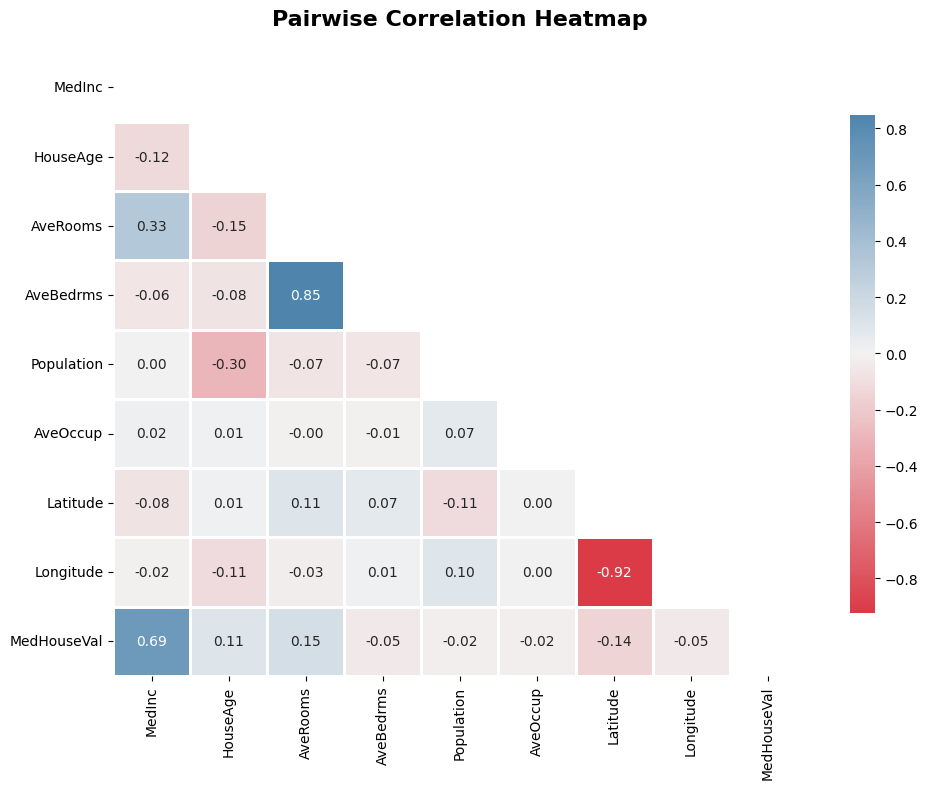


Reduced dataset dimensions: (20640, 8)

Dropped features: ['Latitude']


In [3]:
# ================ Pairwise Correlation and Removing Highly Correlated Features ================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
housing_df = data.frame

# Display the initial shape of the dataset
print(f"Original dataset dimensions: {housing_df.shape}", end="\n\n")

# ------------ Pairwise Correlation Heatmap ------------
# Compute the correlation matrix
corr = housing_df.corr()

# Create a mask for the upper triangle to avoid duplicate values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define a color map for better visualization
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    linewidths=1,
    annot=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8},
)
plt.title("Pairwise Correlation Heatmap", fontsize=16, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

# ------------ Removing Highly Correlated Features ------------
# Compute the absolute correlation matrix
corr_df = housing_df.corr().abs()

# Mask the upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones_like(corr_df, dtype=bool))
upper_triangle_corr = corr_df.mask(upper_triangle_mask)

# Identify features with a correlation greater than 0.85
threshold = 0.85
to_drop = [column for column in upper_triangle_corr.columns if any(upper_triangle_corr[column] > threshold)]

# Drop the identified features
reduced_df = housing_df.drop(to_drop, axis=1)

# Display the reduced dataset dimensions and dropped columns
print(f"\nReduced dataset dimensions: {reduced_df.shape}", end="\n\n")
print(f"Dropped features: {to_drop}")

In [4]:
# ================ Recursive Feature Elimination (RFE) with Logistic Regression ================
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer(as_frame=True)
X = data.data  # Feature dataset
y = data.target  # Target labels

# Display dataset shape
print(f"Dataset dimensions: {X.shape}", end="\n\n")
print(f"Number of target classes: {len(np.unique(y))}", end="\n\n")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values for improved model performance
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize RFE with a Logistic Regression model
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5, verbose=1)

# Fit RFE on the training data
rfe.fit(X_train_std, y_train)

# Map feature names to their RFE rankings
feature_ranking = dict(zip(X.columns, rfe.ranking_))
print("\nFeature rankings (1 = selected, higher = eliminated early):")
print(feature_ranking)

# List of selected features
selected_features = X.columns[rfe.support_]
print("\nSelected features:")
print(selected_features)

# Reduced dataset with selected features
reduced_X = X.loc[:, rfe.support_]
print(f"\nReduced dataset shape: {reduced_X.shape}", end="\n\n")

# Make predictions on the test set
y_pred = rfe.predict(X_test_std)

# Calculate and display the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the RFE-selected model: {accuracy:.2f}")

Dataset dimensions: (569, 30)

Number of target classes: 2

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.

Feature rankings (1 = selected, higher = el

In [5]:
# ================ Combining Multiple Feature Selection Methods ================
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data  # Feature dataset
y = data.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------ LassoCV for Feature Selection ------------
# Fit the LassoCV model
lcv = LassoCV(cv=10, random_state=42)
lcv.fit(X_train, y_train)

# Optimal alpha and R-squared score
print(f"Optimal alpha (LassoCV): {lcv.alpha_:.3f}", end="\n\n")
r_squared_lcv = lcv.score(X_test, y_test)
print(f"LassoCV explains {r_squared_lcv:.1%} of the variance in the test set", end="\n\n")

# Create a mask for non-zero coefficients
lcv_mask = lcv.coef_ != 0
print(f"{sum(lcv_mask)} features selected out of {len(lcv_mask)}", end="\n\n")

# ------------ RFE with RandomForestRegressor ------------
# Initialize RFE with RandomForestRegressor
rfe_rf = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=sum(lcv_mask), step=5, verbose=1)
rfe_rf.fit(X_train, y_train)

# R-squared score for RandomForestRegressor
r_squared_rf = rfe_rf.score(X_test, y_test)
print(f"RandomForestRegressor RFE explains {r_squared_rf:.1%} of the variance in the test set", end="\n\n")
rf_mask = rfe_rf.support_

# ------------ RFE with GradientBoostingRegressor ------------
# Initialize RFE with GradientBoostingRegressor
rfe_gb = RFE(estimator=GradientBoostingRegressor(random_state=42), n_features_to_select=sum(lcv_mask), step=5, verbose=1)
rfe_gb.fit(X_train, y_train)

# R-squared score for GradientBoostingRegressor
r_squared_gb = rfe_gb.score(X_test, y_test)
print(f"GradientBoostingRegressor RFE explains {r_squared_gb:.1%} of the variance in the test set", end="\n\n")
gb_mask = rfe_gb.support_

# ------------ Meta-Feature Selection by Combining Votes ------------
# Combine votes from LassoCV, RandomForest, and GradientBoosting
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(f"Votes per feature: {votes}")

# Create a meta-mask for features selected by all three methods
meta_mask = votes >= 3
print(f"Features selected by all three methods: {sum(meta_mask)}")

# Reduce the dataset using the meta-mask
X_reduced = X.loc[:, meta_mask]
print("\nSelected Features:")
print(X_reduced.columns)

# ------------ Train and Evaluate a Final Model ------------
# Split the reduced dataset into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Standardize the reduced dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# Train a linear regression model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train_reduced)

# Evaluate the model
r_squared_final = lm.score(X_test_scaled, y_test_reduced)
print(f"\nLinear Regression explains {r_squared_final:.1%} of the variance in the test set using {len(lm.coef_)} features.")

Optimal alpha (LassoCV): 0.032

LassoCV explains 59.0% of the variance in the test set

7 features selected out of 8

Fitting estimator with 8 features.
RandomForestRegressor RFE explains 80.5% of the variance in the test set

Fitting estimator with 8 features.
GradientBoostingRegressor RFE explains 78.2% of the variance in the test set

Votes per feature: [3 3 3 1 2 3 3 3]
Features selected by all three methods: 6

Selected Features:
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude'], dtype='object')

Linear Regression explains 59.6% of the variance in the test set using 6 features.


Dataset dimensions: (150, 4)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Principal Components (first 5 rows):
[[-2.26470281  0.4800266   0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356  0.23460885 -0.10300677]
 [-2.36422905 -0.34190802 -0.04420148 -0.02837705]
 [-2.29938422 -0.59739451 -0.09129011  0.06595556]
 [-2.38984217  0.64683538 -0.0157382   0.03592281]]

Explained Variance Ratio per Component:
[0.72962445 0.22850762 0.03668922 0.00517871]

Cumulative Explained Variance:
[0.72962445 0.95813207 0.99482129 1.        ]



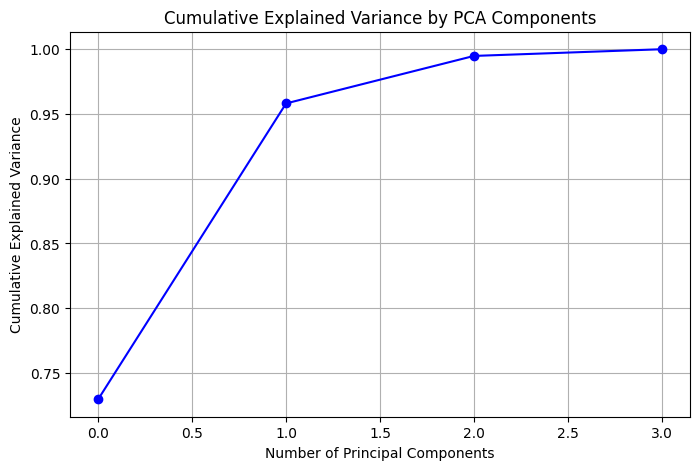


PCA Component Vectors:
PC1 Effects: {'sepal length (cm)': 0.52, 'sepal width (cm)': -0.27, 'petal length (cm)': 0.58, 'petal width (cm)': 0.56}
PC2 Effects: {'sepal length (cm)': 0.38, 'sepal width (cm)': 0.92, 'petal length (cm)': 0.02, 'petal width (cm)': 0.07}

Explained Variance Ratio (2 Components):
[0.72962445 0.22850762]

Total Explained Variance Ratio from PCA: 0.9581



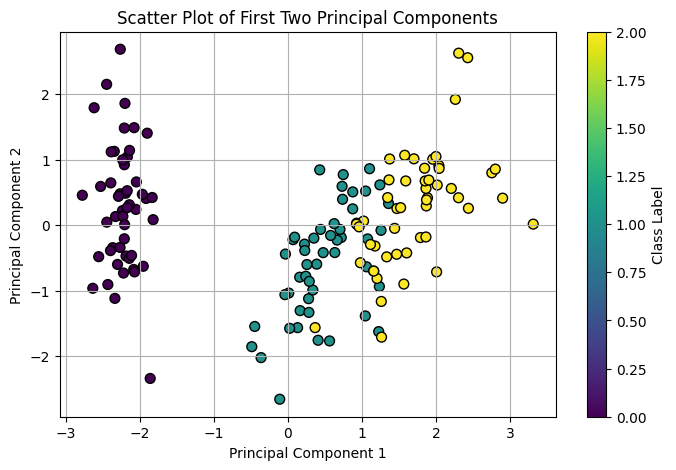

In [6]:
# ================ PCA: Principal Component Analysis with the Iris Dataset ================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Load the Iris dataset
data = load_iris(as_frame=True)
X = data.data  # Features
y = data.target  # Target labels
feature_names = data.feature_names

# Display dataset dimensions and preview
print(f"Dataset dimensions: {X.shape}", end="\n\n")
print(f"Feature names: {feature_names}", end="\n\n")

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Initialize and fit PCA
pca = PCA()
principal_components = pca.fit_transform(X_std)

# Display principal components
print("Principal Components (first 5 rows):")
print(principal_components[:5])

# Inspect the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nExplained Variance Ratio per Component:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_variance, end="\n\n")

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# ------------ PCA in a Pipeline ------------
# Build a pipeline with standard scaling and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))  # Reduce to 2 components
])

# Fit and transform the data using the pipeline
principal_components_pipeline = pipeline.fit_transform(X)

# Extract PCA component vectors and explained variance ratio
pca_vectors = pipeline['pca'].components_.round(2)
explained_variance_pipeline = pipeline['pca'].explained_variance_ratio_

# Display PCA component vectors and effects
print("\nPCA Component Vectors:")
print(f"PC1 Effects: {dict(zip(feature_names, pca_vectors[0]))}")
print(f"PC2 Effects: {dict(zip(feature_names, pca_vectors[1]))}")

# Display explained variance ratio
print("\nExplained Variance Ratio (2 Components):")
print(explained_variance_pipeline, end="\n\n")

# Print the sum of the explained variance ratio from PCA in a fancier format
explained_variance = pipeline['pca'].explained_variance_ratio_.sum()
print(f"Total Explained Variance Ratio from PCA: {explained_variance:.4f}", end="\n\n")

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 5))
plt.scatter(principal_components_pipeline[:, 0], principal_components_pipeline[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class Label')
plt.grid()
plt.show()